In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
from Fireworks.fireworks.nbodylib.dynamics import *
from Fireworks.fireworks.ic import *

In [16]:
N = 150 # max number of particles to test

t_dir, t_vec, t_vec2, t_pyf = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
Nparticles = np.arange(1,N+1)

In [17]:
for n in range(1,N+1):
    # generate initial conditions
    particles = ic_random_uniform(n, 0, 10, 0, 100, 1, 25)
    
    # evaluate time needed to estimate accelerations with acceleration_direct
    t1 = time.perf_counter() 
    acc_direct = acceleration_direct(particles) 
    t2 = time.perf_counter()
    dt_ad = t2-t1
    t_dir[n-1] = dt_ad

    # evaluate time needed to estimate accelerations with acceleration_direct_vectorized
    t3 = time.perf_counter()
    acc_vect = acceleration_direct_vectorized(particles)
    t4 = time.perf_counter()
    dt_v = t4-t3
    t_vec[n-1] = dt_v

    # evaluate time needed to estimate accelerations with acceleration_direct_vectorised2
    t5 = time.perf_counter()
    acc_vect2 = acceleration_direct_vectorised2(particles)
    t6 = time.perf_counter()
    dt_v2 = t6-t5
    t_vec2[n-1] = dt_v2
    
    # evaluate time needed to estimate accelerations with acceleration_pyfalcon
    t7 = time.perf_counter()
    acc_pyf = acceleration_pyfalcon(particles)
    t8 = time.perf_counter()
    dt_pyf = t8-t7
    t_pyf[n-1] = dt_pyf

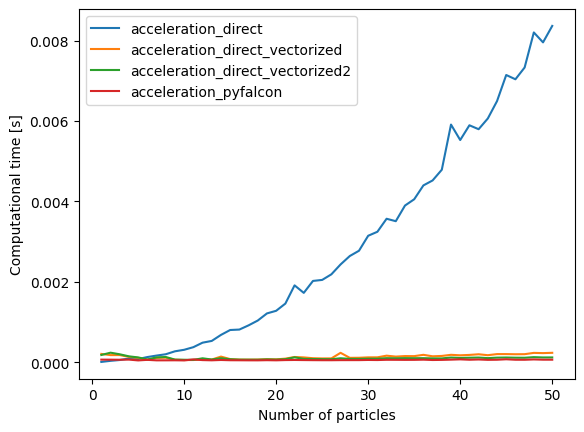

In [18]:
# make the plot
plt.plot(Nparticles, t_dir, label='acceleration_direct')
plt.plot(Nparticles, t_vec, label='acceleration_direct_vectorized')
plt.plot(Nparticles, t_vec2, label='acceleration_direct_vectorized2')
plt.plot(Nparticles, t_pyf, label='acceleration_pyfalcon')
plt.title(f'Maximum number of particles = {N}')
plt.xlabel("Number of particles")
plt.ylabel("Computational time [s]")
plt.legend()
plt.savefig('150comptime_vs_n.png', format='png')
plt.show()